
# Project: Investigate a Dataset - [No-show Appointments]
The goal of this project is to investigate a dataset of appoinment records for Brasil
public hospitals. The data includes some attributes of patients and state if the patients
showed up to appointments. The analysis should be focused on finding trends
influencing patients to show or not show up to appointments. Using descriptive
statistics the following question should be answered: What factors are important for us
to know in order to predict if a patient will show up for their scheduled appointment?
Predictive analytics is out of scope of this project.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I have looked into the dataset and managed a few problems like unifying names,
removing wrong data, adding new features based on existing data. I have also
investigated most of independent variables in the dataset and made a few observations
comparing them to each other as well as to the dependent one (no_show). As this was
only an exploratory analysis, many potential correlations may remain uncovered. The
data should be investigated further with more advanced statistical analysis to potentially
reveal new insights and correlations.

['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
          'SMS_received', 'Age_Stage', 'AttendanceDay', 'AttendanceMonth', 'ScheduledMonth', 'ScheduledDay']

### Question(s) for Analysis
**1-** What is the most frequented gender? and, What is the common case(Show or Not)?

**2-** What is the most neighbourhood tends to be show?

**3-** Is having scholarship important for cases to show?

**4-** Is having an adjective from these list ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'] playes an important role in showing?

**5-** What is the most frequented age and what is the most frequent option to it?

**6-** How each element in this list ['AttendanceDay', 'AttendanceMonth', 'ScheduledMonth', 'ScheduledDay'] effect the showing or not?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime


In [2]:
'''# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0'''

'# Upgrade pandas to use dataframe.explode() function. \n!pip install --upgrade pandas==0.25.0'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
odf=pd.read_csv('/content/drive/MyDrive/FWD/Data/Professional/2nd Project/noshowappointments-kagglev2-may-2016.csv')
odf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
odf.info()
#There is not any null values
#There are some columns data types need to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
print(odf.describe())
#From the output of this line we can say
#Handcap column values must be binary so it needs prepreparation


          PatientId  AppointmentID  ...        Handcap   SMS_received
count  1.105270e+05   1.105270e+05  ...  110527.000000  110527.000000
mean   1.474963e+14   5.675305e+06  ...       0.022248       0.321026
std    2.560949e+14   7.129575e+04  ...       0.161543       0.466873
min    3.921784e+04   5.030230e+06  ...       0.000000       0.000000
25%    4.172614e+12   5.640286e+06  ...       0.000000       0.000000
50%    3.173184e+13   5.680573e+06  ...       0.000000       0.000000
75%    9.439172e+13   5.725524e+06  ...       0.000000       1.000000
max    9.999816e+14   5.790484e+06  ...       4.000000       1.000000

[8 rows x 9 columns]


In [7]:
'''First of all check for duplicate rows due to the two columns have IDs
because it is not allowed to be repeated any ID of them , 
unfortunately there is not a built in line can do this so I will do it manually'''


odf.duplicated(subset='PatientId').sum()

48228

In [8]:
odf.duplicated(subset='AppointmentID').sum()

0

In [9]:
'''Checking for elements in each column if it wants to be changed'''
for i in ['Gender', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']:
  print(i,' The unique elements for this columns is: ', odf[i].unique())

#Handcap must be wrangled to 0 or 1, I will rechange each more than 1 value by 1

Gender  The unique elements for this columns is:  ['F' 'M']
Scholarship  The unique elements for this columns is:  [0 1]
Hipertension  The unique elements for this columns is:  [1 0]
Diabetes  The unique elements for this columns is:  [0 1]
Alcoholism  The unique elements for this columns is:  [0 1]
Handcap  The unique elements for this columns is:  [0 1 2 3 4]
SMS_received  The unique elements for this columns is:  [0 1]
No-show  The unique elements for this columns is:  ['No' 'Yes']


"Age column mustn't has values lower than 0 so it will be replaced by interpulation\nand for very high ages will be exchangd as belwo\nI will turn it into catigorical interval variables represent 7-age stages for better analysis as following:\n1st for early childhood under 7 years\n2nd for childhood form 7 till before 14 years\n3rd for adolescence from 14 till before 28 years\n4th for youth from 28 till before 35 years\n5th for maturity from 35 till before 50 years\n6th for aging from 50 till before 65 years\n7th for old age  from 65 and above"

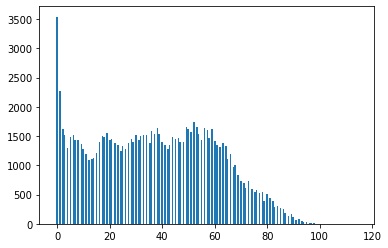

In [10]:
'''Checking for values of age throught it's distribution for investigation of any unwanted data '''
plt.hist(data=odf,x='Age',bins=200);

'''Age column mustn't has values lower than 0 so it will be replaced by interpulation
and for very high ages will be exchangd as belwo
I will turn it into catigorical interval variables represent 7-age stages for better analysis as following:
1st for early childhood under 7 years
2nd for childhood form 7 till before 14 years
3rd for adolescence from 14 till before 28 years
4th for youth from 28 till before 35 years
5th for maturity from 35 till before 50 years
6th for aging from 50 till before 65 years
7th for old age  from 65 and above'''





### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
#create a copy of oiginal dataframe odf to work with
df=odf[odf['Age']==odf['Age']]
len(df['Age'])==len(odf['Age'])

True

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#I will remove duplicates only for PatientId column

df.drop_duplicates(subset='PatientId',inplace=True)
df.duplicated(subset='PatientId').sum()

0

In [13]:
# for handcap column 
for i,v in enumerate(df['Handcap']):
  if v >1:
    df['Handcap'].iloc[i]=1

agestage=[]
#for age column
for i,v in enumerate(df['Age']):
  if v <=1 :
    df['Age'].iloc[i]=(df['Age'].iloc[i-1]+df['Age'].iloc[i+1])/2
  if v>85 :
    df['Age'].iloc[i]=(df['Age'].iloc[i-1]+df['Age'].iloc[i+1])/2
  #For age stage refining
  if v<7:
    agestage.append('Early Childhood')
  elif v<14:
    agestage.append('Childhood')
  elif v<28:
    agestage.append('Adolescence')
  elif v<35:
    agestage.append('Youth')
  elif v<50:
    agestage.append('Maturity')
  elif v<65:
    agestage.append('Aging')
  else:
    agestage.append('Old Age')
df['Age_Stage']=agestage


print(df['Handcap'].unique())
#print("+++++++++++++++++++++++++")
print(df['Age_Stage'].unique())

#nice

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


[0 1]
['Aging' 'Childhood' 'Old Age' 'Adolescence' 'Maturity' 'Youth'
 'Early Childhood']


In [14]:
df.describe()
#nice

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,6.229900e+04,6.229900e+04,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000
mean,1.471711e+14,5.664948e+06,37.192882,0.092907,0.196504,0.070884,0.024174,0.018186,0.327357
std,2.549091e+14,7.396146e+04,22.244390,0.290304,0.397357,0.256633,0.153590,0.133626,0.469252
min,3.921784e+04,5.030230e+06,0.005676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176937e+12,5.629610e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198866e+13,5.671715e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.484809e+13,5.715461e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,91.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Age_Stage'],
      dtype='object')

In [16]:
"""I will drop columns that are not important while EDA['PatientId','No-show', 'AppointmentID','ScheduledDay','AppointmentDay','Age]
Also wil add a two new columns contain the name of scheduled day and month extracted form['AppointmentDay]
I think it is important to test what day or month is popular for showing or not, and the same for ScheduledDay
FinallyI will add new column for Show instade of No-show to eleminate confusion"""

AttendanceDay=[]
AttendanceMonth=[]
ScheduledDay=[]
ScheduledMonth=[]

import datetime
for i,v in enumerate(df['AppointmentDay']) :
  year=str(str(v).split("T")[0]).split("-")[0]
  month=str(str(v).split("T")[0]).split("-")[1]
  day=str(str(v).split("T")[0]).split("-")[2]
  intDay = datetime.date(year=int(year), month=int(month), day=int(day)).weekday()
  days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  months=['Jan','Feb','March','April','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
  AttendanceDay.append(days[intDay])
  AttendanceMonth.append(months[int(month)-1])

for i,v in enumerate(df['ScheduledDay']) :
  year=str(str(v).split("T")[0]).split("-")[0]
  month=str(str(v).split("T")[0]).split("-")[1]
  day=str(str(v).split("T")[0]).split("-")[2]
  intDay = datetime.date(year=int(year), month=int(month), day=int(day)).weekday()
  days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  months=['Jan','Feb','March','April','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
  ScheduledDay.append(days[intDay])
  ScheduledMonth.append(months[int(month)-1])
  
df['AttendanceDay']=AttendanceDay
df['AttendanceMonth']=AttendanceMonth
df['ScheduledDay']=ScheduledDay
df['ScheduledMonth']=ScheduledMonth

df.drop(['PatientId', 'AppointmentID','AppointmentDay','Age','ScheduledDay'],axis=1,inplace=True)
df['ScheduledDay']=ScheduledDay


In [17]:
df.head()


,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Stage,AttendanceDay,AttendanceMonth,ScheduledMonth,ScheduledDay
0,F,JARDIM DA PENHA,0,1,0,0,0,0,No,Aging,Friday,April,April,Friday
1,M,JARDIM DA PENHA,0,0,0,0,0,0,No,Aging,Friday,April,April,Friday
2,F,MATA DA PRAIA,0,0,0,0,0,0,No,Aging,Friday,April,April,Friday
3,F,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Childhood,Friday,April,April,Friday
4,F,JARDIM DA PENHA,0,1,1,0,0,0,No,Aging,Friday,April,April,Friday


<a id='eda'></a>
## Exploratory Data Analysis

1- What is the most frequented gender? and, What is the common case(Show or Not)?

2- What is the most neighbourhood tends to be show?

3- Is having scholarship important for cases to show?

4- Is having an adjective from these list ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'] playes an important role in showing?

5- What is the most frequented age and what is the most frequent option to it?

6- How each element in this list ['AttendanceDay', 'AttendanceMonth', 'ScheduledMonth', 'ScheduledDay'] effect the showing or not?


plotlist=['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
          'SMS_received', 'Age_Stage', 'AttendanceDay', 'AttendanceMonth', 'ScheduledMonth', 'ScheduledDay']



### 1- What is the common gender and the common case(Show or Not) for each gender?


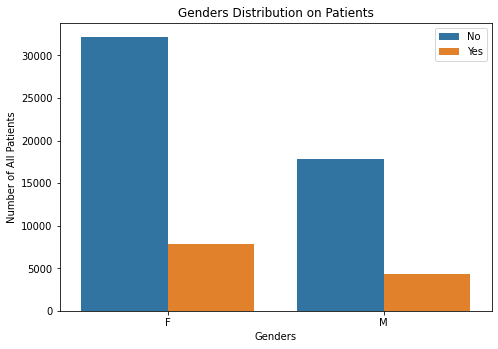

In [18]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1]);
sn.countplot(data=df,x='Gender',hue=df['No-show'],ax=ax);
plt.ylabel('Number of All Patients');                
plt.xlabel('Genders');
plt.title('Genders Distribution on Patients');
plt.legend();

#From the plotted figure we can conclude the most frequented gender is females and the common case for females and males is showing for both of them

**2-** What is the most neighbourhood tends to be show?

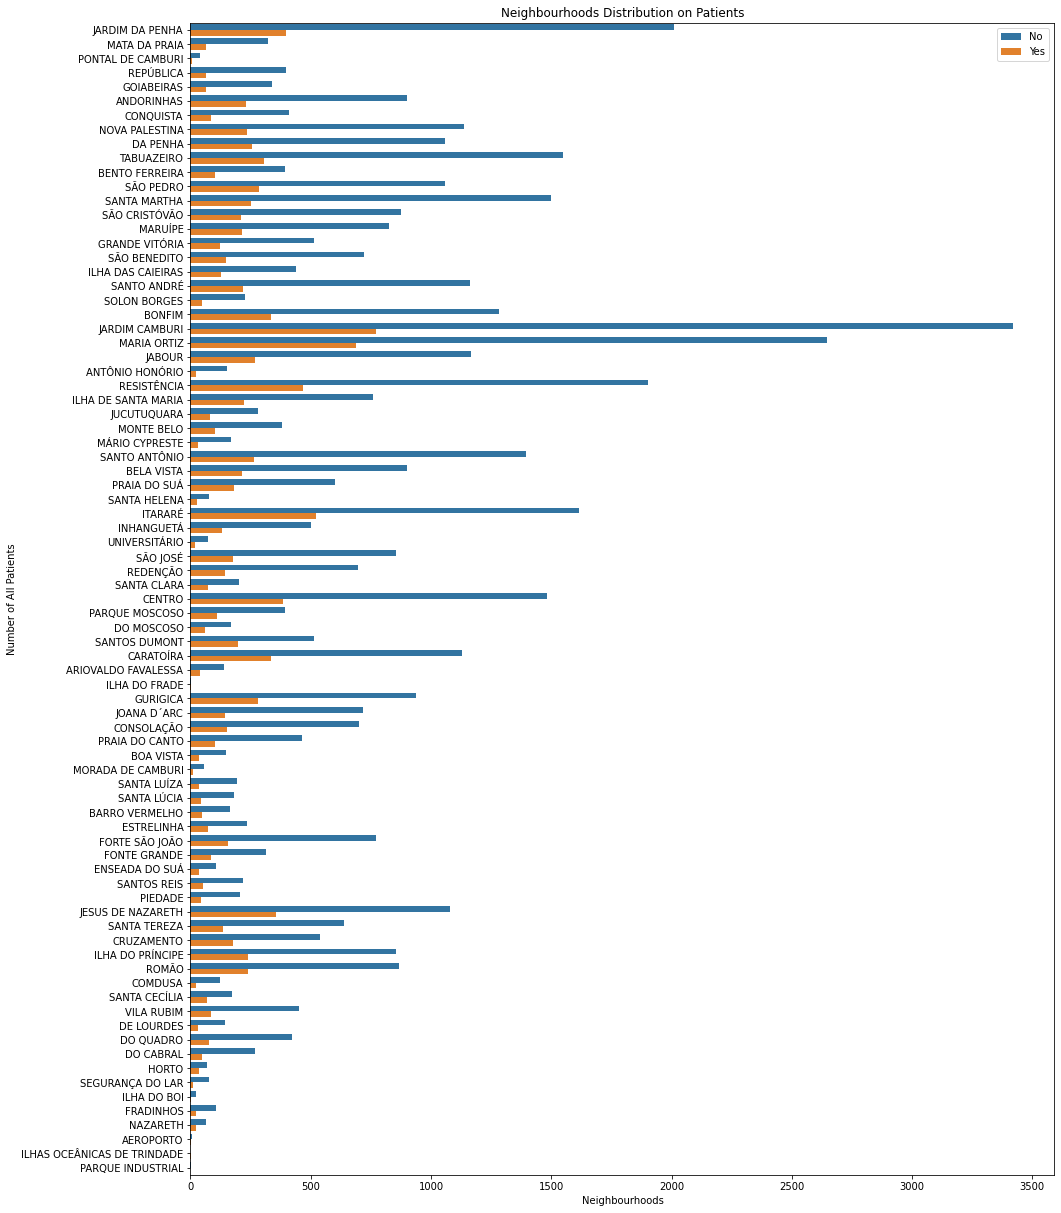

In [19]:
fig=plt.figure();
ax=fig.add_axes([0,0,2,4]);
sn.countplot(data=df,y='Neighbourhood',hue=df['No-show'],ax=ax);
plt.ylabel('Number of All Patients');                
plt.xlabel('Neighbourhoods');
plt.title('Neighbourhoods Distribution on Patients');
plt.legend();

#From the plotted figure we can conclude the most frequented nieghbourhood is JARDIM CAMBURI 
#and most of cases come from this tends to be show, also the same investigation for the most frequented 5 neighbourhoods

**3-** Is having scholarship important for cases to show?

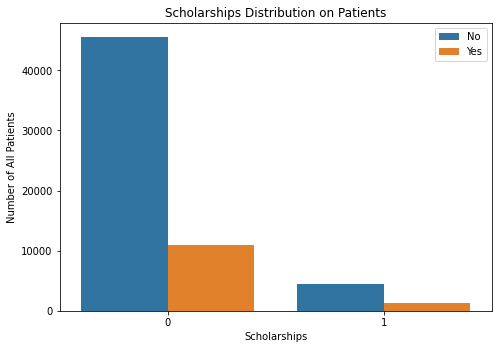

In [20]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1]);
sn.countplot(data=df,x='Scholarship',hue=df['No-show'],ax=ax);
plt.ylabel('Number of All Patients');                
plt.xlabel('Scholarships');
plt.title('Scholarships Distribution on Patients');
plt.legend();

#From the plotted figure we can conclude the most of patients were not had a scholarship at the same time most of them are showing

**4-** Is having an adjective from these list ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'] playes an important role in showing?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


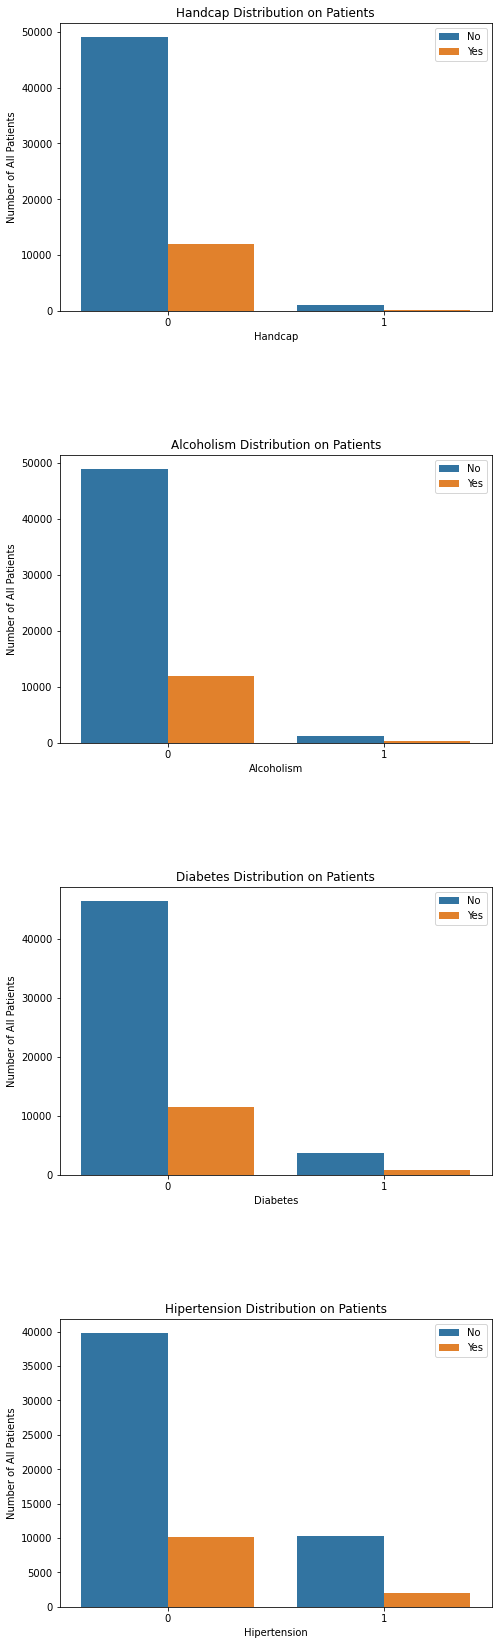

In [21]:
plotlist=['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
o=0
for v in (plotlist) :
  ax=fig.add_axes([0,o,1,1])
  sn.countplot(data=df,x=str(v),hue=df['No-show'],ax=ax);
  plt.ylabel('Number of All Patients');                
  plt.xlabel('{}'.format(str(v)));
  plt.title('{} Distribution on Patients'.format(str(v)));
  plt.legend();
  o+=1.5

#Most of cases do not have any adjective and at the same time most of them are showing

**5-** What is the most frequented age and what is the most frequent option to it?

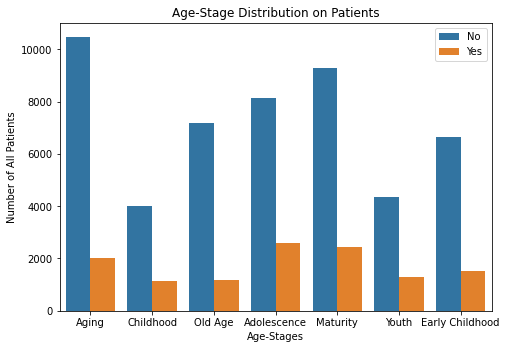

In [22]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1]);
sn.countplot(data=df,x='Age_Stage',hue='No-show',ax=ax);
plt.ylabel('Number of All Patients');                
plt.xlabel('Age-Stages');
plt.title('Age-Stage Distribution on Patients');
plt.legend();

#Most of cases are in the stages Aging, Maturity, and Adolescence and also most of them tends to show

**6-** How each element in this list ['AttendanceDay', 'AttendanceMonth', 'ScheduledMonth', 'ScheduledDay'] effect the showing or not?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


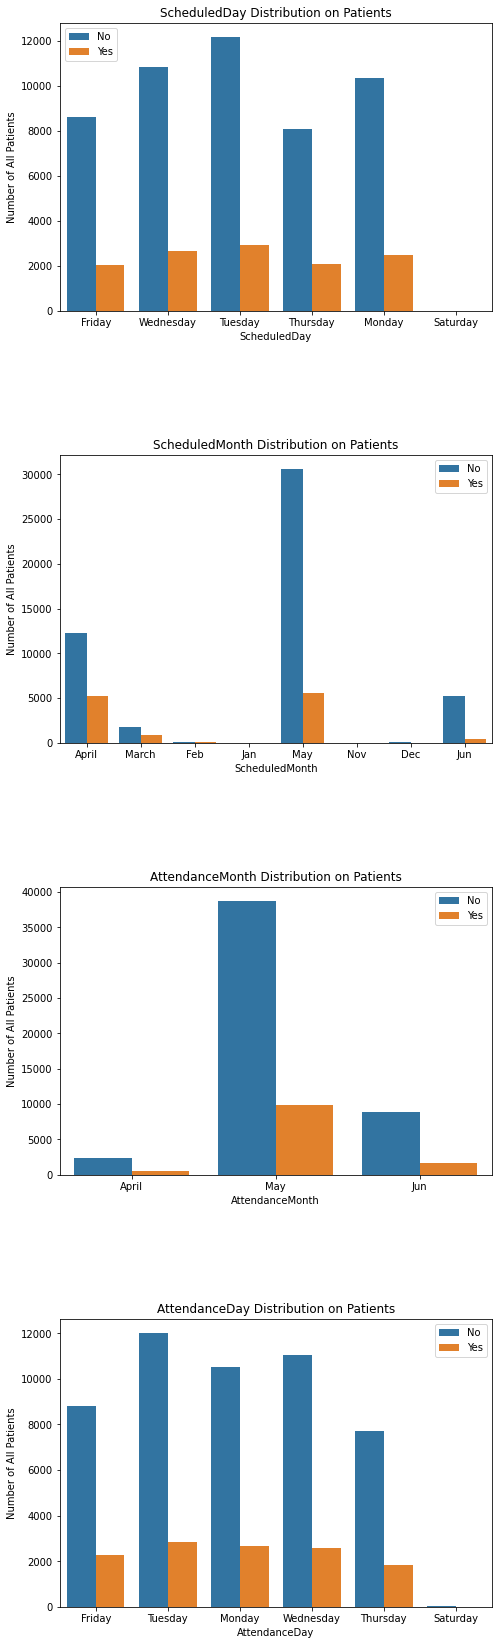

In [23]:
plotlist= ['AttendanceDay', 'AttendanceMonth', 'ScheduledMonth', 'ScheduledDay']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
o=0
for v in (plotlist) :
  ax=fig.add_axes([0,o,1,1]);
  sn.countplot(data=df,x=str(v),hue=df['No-show'],ax=ax);
  plt.ylabel('Number of All Patients');                
  plt.xlabel('{}'.format(str(v)));
  plt.title('{} Distribution on Patients'.format(str(v)));
  plt.legend();
  o+=1.5

#Most of cases prefer to attend and schedule at all days of week except Saturday and most of them are showing 
#Almost all of cases prefer to attend and schedule at the month of May and almost all of them are showing

<a id='conclusions'></a>
## Conclusions


> **Finding 1-** The most frequented gender is females and the common case for females and males is showing for both of them.
> **Conclusion 1-** We can make offers to males to encarage them to attend.

> **Finding 2-**The most frequented nieghbourhood is JARDIM CAMBURI and most of cases come from this tends to be show, also the same investigation for the most frequented 5 neighbourhoods.
> **Conclusion 2-**It is important to take pledge for advance booking form patients those come from nieghbourhoods other those five to ensure they will attend and will not waste the opportunity on others.

> **Finding 3-**Most of patients were not had a scholarship at the same time most of them are showing.
> **Conclusion 3-**So, it is not important to offer a scholarship for patients cause it will have a high cost to the owner.

> **Finding 4-**Most of cases do not have any adjective and at the same time most of them are showing.
> **Conclusion 4-**It is not important to marke them adjectives or disabilities to ensure that, they will attend.

> **Finding 5-**Most of cases are in the stages Aging, Maturity, and Adolescence and also most of them tends to show.
> **Conclusion 5-**It is better to conduct an in-depth study on the fact that the disease is confined to a certain age group, it is possible to spread a specific disease that no one knows about.

> **Finding 6-**ost of cases prefer to attend and schedule at all days of week except Saturday and most of them are showing. Almost all of cases prefer to attend and schedule at the month of May and almost all of them are showing
> **Conclusion 6-**For a lower cost, please close the days and months when attendance is not sufficient and refer to other nearby places for examination.



### Limitations:

 - The data set includes mistakes data like age with negtive value and appointment day before scheduled day.

 - Adding distances between the neighborhoods and the hospitable to the dataset may give good results on 
   the neighborhood's impact .

